In [37]:
from transformers import AutoTokenizer, BloomForCausalLM
import torch
from tqdm import tqdm
import matplotlib.pyplot as plt
import copy

In [2]:
def find_all_target_modules(model):
    target_module_name_list = []
    for name, module in model.named_modules():
        if len(module._parameters) > 0:
            target_module_name_list.append(name)
    return target_module_name_list

In [3]:
lang_code_list = ['arb_Arab', 'fra_Latn', 'spa_Latn', 'eng_Latn', 'deu_Latn', 'ita_Latn', 'jpn_Jpan', 'rus_Cyrl', 'zho_Hans', 'zho_Hant']
model_path = "/data/lypan/llms/bloom-560m"
tokenizer = AutoTokenizer.from_pretrained(model_path)
bloom = BloomForCausalLM.from_pretrained(model_path).to("cuda:1")

target_module_name_list = find_all_target_modules(bloom)
target_module_names = ['transformer.h.0.input_layernorm', 'transformer.h.0.self_attention.query_key_value', 'transformer.h.0.self_attention.dense', 'transformer.h.0.post_attention_layernorm', 'transformer.h.0.mlp.dense_h_to_4h', 'transformer.h.0.mlp.dense_4h_to_h', 
                       'transformer.h.1.input_layernorm', 'transformer.h.1.self_attention.query_key_value', 'transformer.h.1.self_attention.dense', 'transformer.h.1.post_attention_layernorm', 'transformer.h.1.mlp.dense_h_to_4h', 'transformer.h.1.mlp.dense_4h_to_h', 
                       'transformer.h.2.input_layernorm', 'transformer.h.2.self_attention.query_key_value', 'transformer.h.2.self_attention.dense', 'transformer.h.2.post_attention_layernorm', 'transformer.h.2.mlp.dense_h_to_4h', 'transformer.h.2.mlp.dense_4h_to_h', 
                       'transformer.h.3.input_layernorm', 'transformer.h.3.self_attention.query_key_value', 'transformer.h.3.self_attention.dense', 'transformer.h.3.post_attention_layernorm', 'transformer.h.3.mlp.dense_h_to_4h', 'transformer.h.3.mlp.dense_4h_to_h', 
                       'transformer.h.4.input_layernorm', 'transformer.h.4.self_attention.query_key_value', 'transformer.h.4.self_attention.dense', 'transformer.h.4.post_attention_layernorm', 'transformer.h.4.mlp.dense_h_to_4h', 'transformer.h.4.mlp.dense_4h_to_h', 
                       'transformer.h.5.input_layernorm', 'transformer.h.5.self_attention.query_key_value', 'transformer.h.5.self_attention.dense', 'transformer.h.5.post_attention_layernorm', 'transformer.h.5.mlp.dense_h_to_4h', 'transformer.h.5.mlp.dense_4h_to_h', 
                       'transformer.h.6.input_layernorm', 'transformer.h.6.self_attention.query_key_value', 'transformer.h.6.self_attention.dense', 'transformer.h.6.post_attention_layernorm', 'transformer.h.6.mlp.dense_h_to_4h', 'transformer.h.6.mlp.dense_4h_to_h', 
                       'transformer.h.7.input_layernorm', 'transformer.h.7.self_attention.query_key_value', 'transformer.h.7.self_attention.dense', 'transformer.h.7.post_attention_layernorm', 'transformer.h.7.mlp.dense_h_to_4h', 'transformer.h.7.mlp.dense_4h_to_h', 
                       'transformer.h.8.input_layernorm', 'transformer.h.8.self_attention.query_key_value', 'transformer.h.8.self_attention.dense', 'transformer.h.8.post_attention_layernorm', 'transformer.h.8.mlp.dense_h_to_4h', 'transformer.h.8.mlp.dense_4h_to_h', 
                       'transformer.h.9.input_layernorm', 'transformer.h.9.self_attention.query_key_value', 'transformer.h.9.self_attention.dense', 'transformer.h.9.post_attention_layernorm', 'transformer.h.9.mlp.dense_h_to_4h', 'transformer.h.9.mlp.dense_4h_to_h', 
                       'transformer.h.10.input_layernorm', 'transformer.h.10.self_attention.query_key_value', 'transformer.h.10.self_attention.dense', 'transformer.h.10.post_attention_layernorm', 'transformer.h.10.mlp.dense_h_to_4h', 'transformer.h.10.mlp.dense_4h_to_h', 
                       'transformer.h.11.input_layernorm', 'transformer.h.11.self_attention.query_key_value', 'transformer.h.11.self_attention.dense', 'transformer.h.11.post_attention_layernorm', 'transformer.h.11.mlp.dense_h_to_4h', 'transformer.h.11.mlp.dense_4h_to_h', 
                       'transformer.h.12.input_layernorm', 'transformer.h.12.self_attention.query_key_value', 'transformer.h.12.self_attention.dense', 'transformer.h.12.post_attention_layernorm', 'transformer.h.12.mlp.dense_h_to_4h', 'transformer.h.12.mlp.dense_4h_to_h', 
                       'transformer.h.13.input_layernorm', 'transformer.h.13.self_attention.query_key_value', 'transformer.h.13.self_attention.dense', 'transformer.h.13.post_attention_layernorm', 'transformer.h.13.mlp.dense_h_to_4h', 'transformer.h.13.mlp.dense_4h_to_h', 
                       'transformer.h.14.input_layernorm', 'transformer.h.14.self_attention.query_key_value', 'transformer.h.14.self_attention.dense', 'transformer.h.14.post_attention_layernorm', 'transformer.h.14.mlp.dense_h_to_4h', 'transformer.h.14.mlp.dense_4h_to_h', 
                       'transformer.h.15.input_layernorm', 'transformer.h.15.self_attention.query_key_value', 'transformer.h.15.self_attention.dense', 'transformer.h.15.post_attention_layernorm', 'transformer.h.15.mlp.dense_h_to_4h', 'transformer.h.15.mlp.dense_4h_to_h', 
                       'transformer.h.16.input_layernorm', 'transformer.h.16.self_attention.query_key_value', 'transformer.h.16.self_attention.dense', 'transformer.h.16.post_attention_layernorm', 'transformer.h.16.mlp.dense_h_to_4h', 'transformer.h.16.mlp.dense_4h_to_h', 
                       'transformer.h.17.input_layernorm', 'transformer.h.17.self_attention.query_key_value', 'transformer.h.17.self_attention.dense', 'transformer.h.17.post_attention_layernorm', 'transformer.h.17.mlp.dense_h_to_4h', 'transformer.h.17.mlp.dense_4h_to_h', 
                       'transformer.h.18.input_layernorm', 'transformer.h.18.self_attention.query_key_value', 'transformer.h.18.self_attention.dense', 'transformer.h.18.post_attention_layernorm', 'transformer.h.18.mlp.dense_h_to_4h', 'transformer.h.18.mlp.dense_4h_to_h', 
                       'transformer.h.19.input_layernorm', 'transformer.h.19.self_attention.query_key_value', 'transformer.h.19.self_attention.dense', 'transformer.h.19.post_attention_layernorm', 'transformer.h.19.mlp.dense_h_to_4h', 'transformer.h.19.mlp.dense_4h_to_h', 
                       'transformer.h.20.input_layernorm', 'transformer.h.20.self_attention.query_key_value', 'transformer.h.20.self_attention.dense', 'transformer.h.20.post_attention_layernorm', 'transformer.h.20.mlp.dense_h_to_4h', 'transformer.h.20.mlp.dense_4h_to_h', 
                       'transformer.h.21.input_layernorm', 'transformer.h.21.self_attention.query_key_value', 'transformer.h.21.self_attention.dense', 'transformer.h.21.post_attention_layernorm', 'transformer.h.21.mlp.dense_h_to_4h', 'transformer.h.21.mlp.dense_4h_to_h', 
                       'transformer.h.22.input_layernorm', 'transformer.h.22.self_attention.query_key_value', 'transformer.h.22.self_attention.dense', 'transformer.h.22.post_attention_layernorm', 'transformer.h.22.mlp.dense_h_to_4h', 'transformer.h.22.mlp.dense_4h_to_h', 
                       'transformer.h.23.input_layernorm', 'transformer.h.23.self_attention.query_key_value', 'transformer.h.23.self_attention.dense', 'transformer.h.23.post_attention_layernorm', 'transformer.h.23.mlp.dense_h_to_4h', 'transformer.h.23.mlp.dense_4h_to_h', 
                       ]
forward_cache = []
backward_cache = []
importance_matrix_dict = {key: {key: [] for key in target_module_names} for key in lang_code_list}

In [4]:
print(target_module_name_list)

['transformer.word_embeddings', 'transformer.word_embeddings_layernorm', 'transformer.h.0.input_layernorm', 'transformer.h.0.self_attention.query_key_value', 'transformer.h.0.self_attention.dense', 'transformer.h.0.post_attention_layernorm', 'transformer.h.0.mlp.dense_h_to_4h', 'transformer.h.0.mlp.dense_4h_to_h', 'transformer.h.1.input_layernorm', 'transformer.h.1.self_attention.query_key_value', 'transformer.h.1.self_attention.dense', 'transformer.h.1.post_attention_layernorm', 'transformer.h.1.mlp.dense_h_to_4h', 'transformer.h.1.mlp.dense_4h_to_h', 'transformer.h.2.input_layernorm', 'transformer.h.2.self_attention.query_key_value', 'transformer.h.2.self_attention.dense', 'transformer.h.2.post_attention_layernorm', 'transformer.h.2.mlp.dense_h_to_4h', 'transformer.h.2.mlp.dense_4h_to_h', 'transformer.h.3.input_layernorm', 'transformer.h.3.self_attention.query_key_value', 'transformer.h.3.self_attention.dense', 'transformer.h.3.post_attention_layernorm', 'transformer.h.3.mlp.dense_h_

In [5]:
def read_data(file_path):
    sent_list = []
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file.readlines():
            sent_list.append(line.replace("\n", ""))
    return sent_list

def read_monolingual_data(lang_code):
    file_path = "/data/lypan/peft/data/flores200_dataset/dev/" + lang_code + ".dev"
    sent_list = read_data(file_path)
    return sent_list

def find_specific_target_module(model, target_module_name):
    for name, module in model.named_modules():
        if name == target_module_name:
            return module

def forward_hook(module, input, output, module_name):
    # 在前向传播时调用
    forward_cache.append(output)

def backward_hook(module, grad_input, grad_output, module_name):
    # 在反向传播时调用
    backward_cache.append(grad_output[0])

def add_hooks(model, target_module_names):
    # hook_handle_forward = module.register_forward_hook(forward_hook)
    # hook_handle_backward = module.register_backward_hook(backward_hook)
    # return hook_handle_forward, hook_handle_backward
    print(target_module_names)
    hook_forwards, hook_backwards = [], []
    for name, module in model.named_modules():
        # if name in target_module_names:
        if name in target_module_names:
            print(name, module)
            handle_forward = module.register_forward_hook(lambda m, i, o, module_name=name: forward_hook(m, i, o, name))
            handle_backward = module.register_backward_hook(lambda m, gi, go, module_name=name: backward_hook(m, gi, go, name))
            hook_forwards.append(handle_forward)
            hook_backwards.append(handle_backward)

    return hook_forwards, hook_backwards

def remove_hook(hook_forwards, hook_backwards):
    for hook_forward, hook_backward in zip(hook_forwards, hook_backwards):
        hook_forward.remove()
        hook_backward.remove()

In [ ]:
hook_forwards, hook_backwards = add_hooks(bloom, target_module_names)
# print(hook_backwards, hook_backwards)

for i in range(len(lang_code_list)):
    cur_lang_code = lang_code_list[i]

    sent_list = read_monolingual_data(cur_lang_code)

    for j in tqdm(range(len(sent_list))):
        text = sent_list[j]

        inputs = tokenizer(text, return_tensors="pt").to("cuda:1")

        input = inputs["input_ids"][:, 0:len(inputs["input_ids"][0]) - 1]
        label = inputs["input_ids"][:, 1:len(inputs["input_ids"][0])]

        # print("input: ", input, " label: ", label)
        outputs = bloom(input, labels=label)
        loss = outputs.loss
        loss.backward()

        for k in range(len(target_module_names)):
            cur_module_name = target_module_names[k]
            importance_matrix = (forward_cache[k] * backward_cache[len(backward_cache) - k - 1]).abs()
            importance_matrix = importance_matrix.view(-1, importance_matrix.size(-1)).mean(0)
            importance_matrix_dict[cur_lang_code][cur_module_name].append(importance_matrix.detach().cpu())

        forward_cache = []
        backward_cache = []
        # 清零梯度
        bloom.zero_grad()

In [ ]:
language_agnostic_neurons = {key: [] for key in target_module_names}
language_specific_neurons = {key: [] for key in target_module_names}
language_specific_neurons_per_lang = {key: {key: [] for key in lang_code_list} for key in target_module_names}
for i in range(len(target_module_names)):
    # plt.figure(figsize=(15, 4))
    cur_module_name = target_module_names[i]

    sum_importance_matrix_list = []

    for j in range(len(lang_code_list)):
        cur_lang_code = lang_code_list[j]
        all_importance_matrix = torch.stack(importance_matrix_dict[cur_lang_code][cur_module_name]) # [sent_num, neuron_num]
        sum_importance_matrix = all_importance_matrix.sum(0)
        # avg_importance_matrix = sum_importance_matrix / all_importance_matrix.size(0)
        sum_importance_matrix_list.append(sum_importance_matrix)

    #     data = sum_importance_matrix.detach().cpu().numpy()

    #     plt.bar(range(len(data)), data, width=1.0, label=cur_lang_code, alpha=0.5)

    # plt.xlabel('Index')
    # plt.ylabel('Value')
    # plt.title(cur_module_name + ' Neuron Importance')

    # plt.legend()
    # plt.show()

    all_sum_importance_matrix = torch.stack(sum_importance_matrix_list) #[lang_num, neuron_num]
    all_sum_importance_matrix_var = torch.var(all_sum_importance_matrix, dim=0) #[neuron_num]

    # 按照方差大小对神经元进行排序
    sorted_values, sorted_indices = torch.sort(all_sum_importance_matrix_var, descending=True)

    neuron_num = all_sum_importance_matrix_var.size(0)
    lang_num = all_sum_importance_matrix.size(0)
    agnostic_indices_list = []
    specific_indices_list = list(range(neuron_num))
    
    for k in range(neuron_num):
        cur_indice = (int)(sorted_indices[k])
        # 初始化分数
        if k == 0:
            previous_score = 0
            present_score = 0
        for lang in range(lang_num):
            print("Lang: ", lang)
            lang_index1 = lang
            lang_index2 = lang % (lang_num - 1)
            agnostic_indices_list_copy = copy.deepcopy(agnostic_indices_list)
            agnostic_indices_list_copy = agnostic_indices_list_copy.append(cur_indice)
            sim_score = torch.cosine_similarity(all_sum_importance_matrix[lang_index1][agnostic_indices_list_copy], 
                                                all_sum_importance_matrix[lang_index2][agnostic_indices_list_copy])
            
            print(sim_score)
            specific_indices_list_copy = copy.deepcopy(specific_indices_list)
            specific_indices_list_copy = specific_indices_list_copy.remove(cur_indice)
            dissim_score = 1 - torch.cosine_similarity(all_sum_importance_matrix[lang_index1][specific_indices_list_copy],
                                                        all_sum_importance_matrix[lang_index2][specific_indices_list_copy])
            print(dissim_score)
            present_score = present_score + sim_score + dissim_score


        print(present_score)
        if present_score > previous_score:
            agnostic_indices_list.append(cur_indice)
            specific_indices_list.remove(cur_indice)
            previous_score = present_score
            present_score = 0
        else:
            break

    print(target_module_names[i])
    print(len(agnostic_indices_list), agnostic_indices_list)

    
    # ratio = 0.1
    # values, indices = torch.topk(all_sum_importance_matrix_var, (int)(ratio * all_sum_importance_matrix_var.size(0)))

    # sorted_specific_indices, _ = torch.sort(indices)
    # all_indices = torch.arange(all_sum_importance_matrix_var.size(0))
    # mask = torch.isin(all_indices, sorted_specific_indices)
    # sorted_agnostic_indices = all_indices[~mask]
    
    # language_agnostic_neurons[cur_module_name] = sorted_agnostic_indices.tolist()
    # language_specific_neurons[cur_module_name] = sorted_specific_indices.tolist()
    
    # for indice in sorted_specific_indices:
    #     max_value = 0
    #     max_value_correspond_lang = ""
    #     for i in range(len(lang_code_list)):
    #         if sum_importance_matrix_list[i][indice] > max_value:
    #             max_value = sum_importance_matrix_list[i][indice]
    #             max_value_correspond_lang = lang_code_list[i]
    #     language_specific_neurons_per_lang[cur_module_name][max_value_correspond_lang].append(indice.item())

: 

In [8]:
import json

folder_path = "/data/lypan/llm_interpre/neuron_info/bloom-560m/"

with open(folder_path + 'lang_agnos.json', 'w') as json_file:
    json.dump(language_agnostic_neurons, json_file)

with open(folder_path + 'lang_speci.json', 'w') as json_file:
    json.dump(language_specific_neurons, json_file)

with open(folder_path + 'lang_speci_by_lang.json', 'w') as json_file:
    json.dump(language_specific_neurons_per_lang, json_file)

In [ ]:
language_agnostic_representation = {key: [] for key in target_module_names}
language_specific_representation = {key: [] for key in target_module_names}
forward_cache = []

repre_method = "part"

for i in range(len(lang_code_list)):
    cur_lang_code = lang_code_list[i]

    sent_list = read_monolingual_data(cur_lang_code)

    for j in tqdm(range(len(sent_list))):
        text = sent_list[j]
        inputs = tokenizer(text, return_tensors="pt").to("cuda:2")

        input = inputs["input_ids"][:, 0:len(inputs["input_ids"][0]) - 1]
        label = inputs["input_ids"][:, 1:len(inputs["input_ids"][0])]
        outputs = bloom(input, labels=label)

        for k in range(len(target_module_names)):
            cur_module_name = target_module_names[k]

            if repre_method == "all":
                agnostic_length = len(language_specific_neurons[cur_module_name])
                specific_length = len(language_agnostic_neurons[cur_module_name])
                all_indices = torch.arange(agnostic_length + specific_length)

                agnostic_bool_mask_matrix = torch.isin(all_indices, torch.tensor(language_specific_neurons[cur_module_name]))
                specific_bool_mask_matrix = ~agnostic_bool_mask_matrix

                agnostic_mask_matrix = torch.where(agnostic_bool_mask_matrix, torch.tensor(0), torch.tensor(1))
                specific_mask_matrix = torch.where(specific_bool_mask_matrix, torch.tensor(0), torch.tensor(1))
                # print(agnostic_mask_matrix)

                language_agnostic_representation[cur_module_name].append(forward_cache[k].detach().cpu() * agnostic_mask_matrix)
                language_specific_representation[cur_module_name].append(forward_cache[k].detach().cpu() * specific_mask_matrix)
                
            elif repre_method == "part":
                language_agnostic_representation[cur_module_name].append(forward_cache[k].detach().cpu().index_select(
                    -1, torch.tensor(language_agnostic_neurons[target_module_names[k]])))
                language_specific_representation[cur_module_name].append(forward_cache[k].detach().cpu().index_select(
                    -1, torch.tensor(language_specific_neurons[target_module_names[k]])))

        forward_cache = []

In [ ]:
mean_agnostic_repre = [tensor.mean(dim=1) for tensor in language_agnostic_representation["transformer.h.12.mlp.dense_h_to_4h"]]
agnostic_repre = torch.stack(mean_agnostic_repre)
# agnostic_repre = torch.cat(language_agnostic_representation["transformer.h.8.self_attention.query_key_value"], dim=1)
mean_agnostic_repre = agnostic_repre.view(-1, agnostic_repre.shape[-1])

In [ ]:
mean_specific_repre = [tensor.mean(dim=1) for tensor in language_specific_representation["transformer.h.12.mlp.dense_h_to_4h"]]
specific_repre = torch.stack(mean_specific_repre)
# specific_repre = torch.cat(language_specific_representation["transformer.h.8.self_attention.query_key_value"], dim=1)
mean_specific_repre = specific_repre.view(-1, specific_repre.shape[-1])

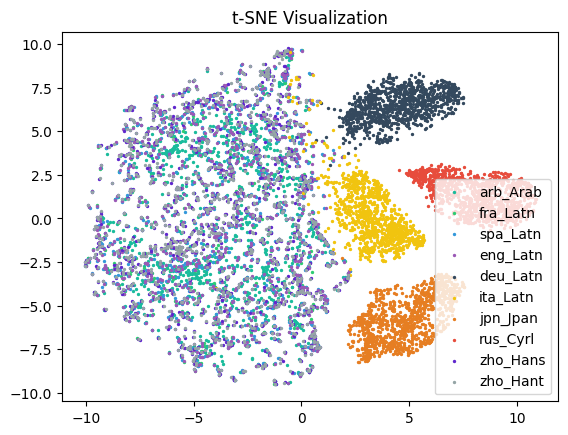

In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

high_dimensional_data = mean_agnostic_repre

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
low_dimensional_data = tsne.fit_transform(high_dimensional_data)

colors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#f1c40f', '#e67e22', '#e74c3c', '#5f27cd', '#95a5a6']
for i in range((int)(len(low_dimensional_data) / 997)):
    start = i * 997
    end = (i + 1) * 997
    plt.scatter(low_dimensional_data[start:end, 0], low_dimensional_data[start:end, 1], c=colors[i], label='{}'.format(lang_code_list[i]), s=2)
plt.title('t-SNE Visualization')
plt.legend()
plt.show()

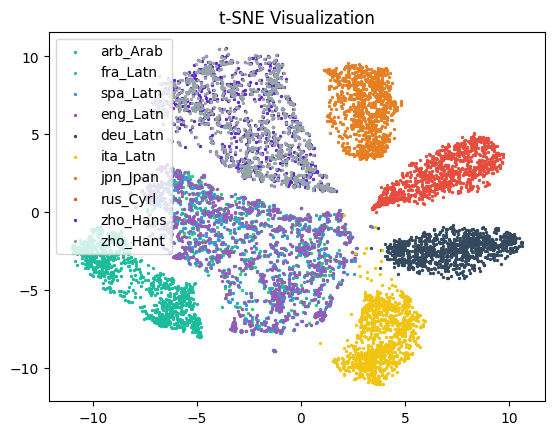

In [ ]:
import torch
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

high_dimensional_data = mean_specific_repre

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
low_dimensional_data = tsne.fit_transform(high_dimensional_data)

colors = ['#1abc9c', '#2ecc71', '#3498db', '#9b59b6', '#34495e', '#f1c40f', '#e67e22', '#e74c3c', '#5f27cd', '#95a5a6']
for i in range((int)(len(low_dimensional_data) / 997)):
    start = i * 997
    end = (i + 1) * 997
    plt.scatter(low_dimensional_data[start:end, 0], low_dimensional_data[start:end, 1], c=colors[i], label='{}'.format(lang_code_list[i]), s=2)
plt.title('t-SNE Visualization')
plt.legend()
plt.show()